<a href="https://colab.research.google.com/github/Ruchitha654/US_Airlines/blob/main/USAirlinesML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Operation
import pandas as pd
import numpy as np
# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split # Split Data
from imblearn.over_sampling import SMOTE # Handling Imbalanced
# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics
# Data Visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Tweets.csv')

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
data.shape

(14640, 15)

In [ ]:
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [ ]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Distribution of Sentiments in tweets: 
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


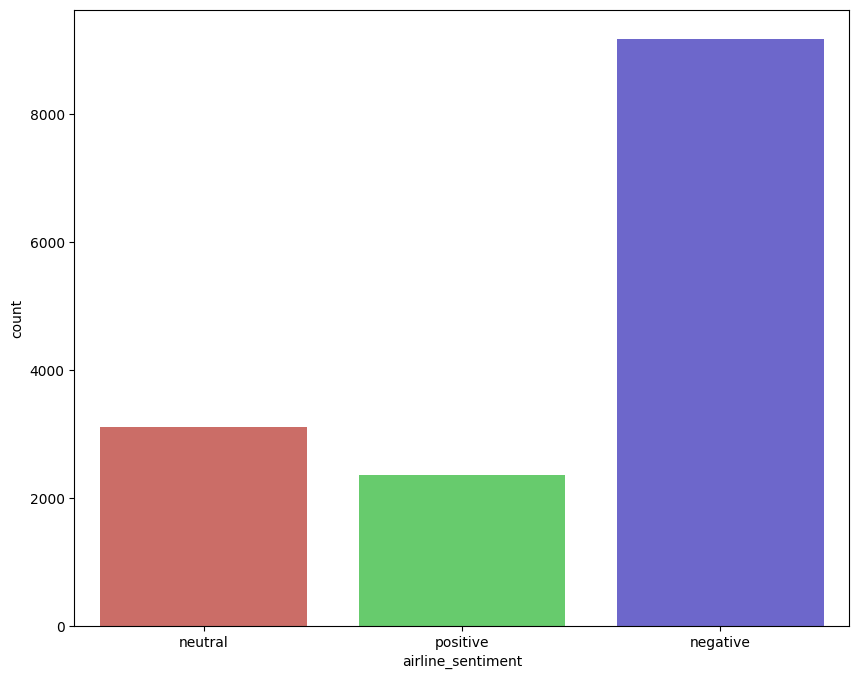

In [ ]:
print("Distribution of Sentiments in tweets: ")
print(data.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = data, palette = 'hls')
plt.show()

Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


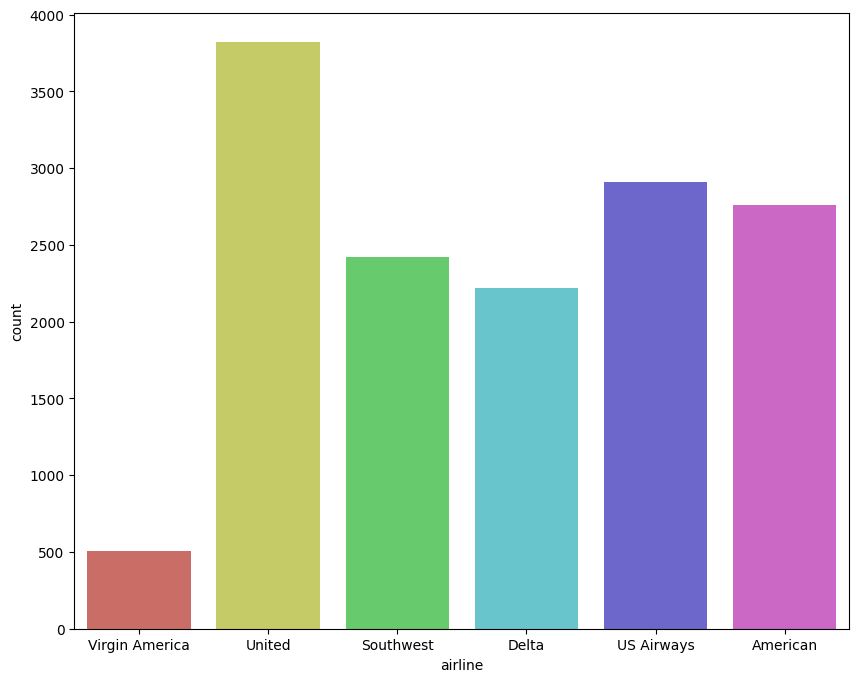

Total number of sentiment tweets for each airline :
US Airways : 
 airline_sentiment
negative    2263
neutral      381
positive     269
Name: count, dtype: int64
United : 
 airline_sentiment
negative    2633
neutral      697
positive     492
Name: count, dtype: int64
American : 
 airline_sentiment
negative    1960
neutral      463
positive     336
Name: count, dtype: int64
Southwest : 
 airline_sentiment
negative    1186
neutral      664
positive     570
Name: count, dtype: int64
Delta : 
 airline_sentiment
negative    955
neutral     723
positive    544
Name: count, dtype: int64
Virgin America : 
 airline_sentiment
negative    181
neutral     171
positive    152
Name: count, dtype: int64


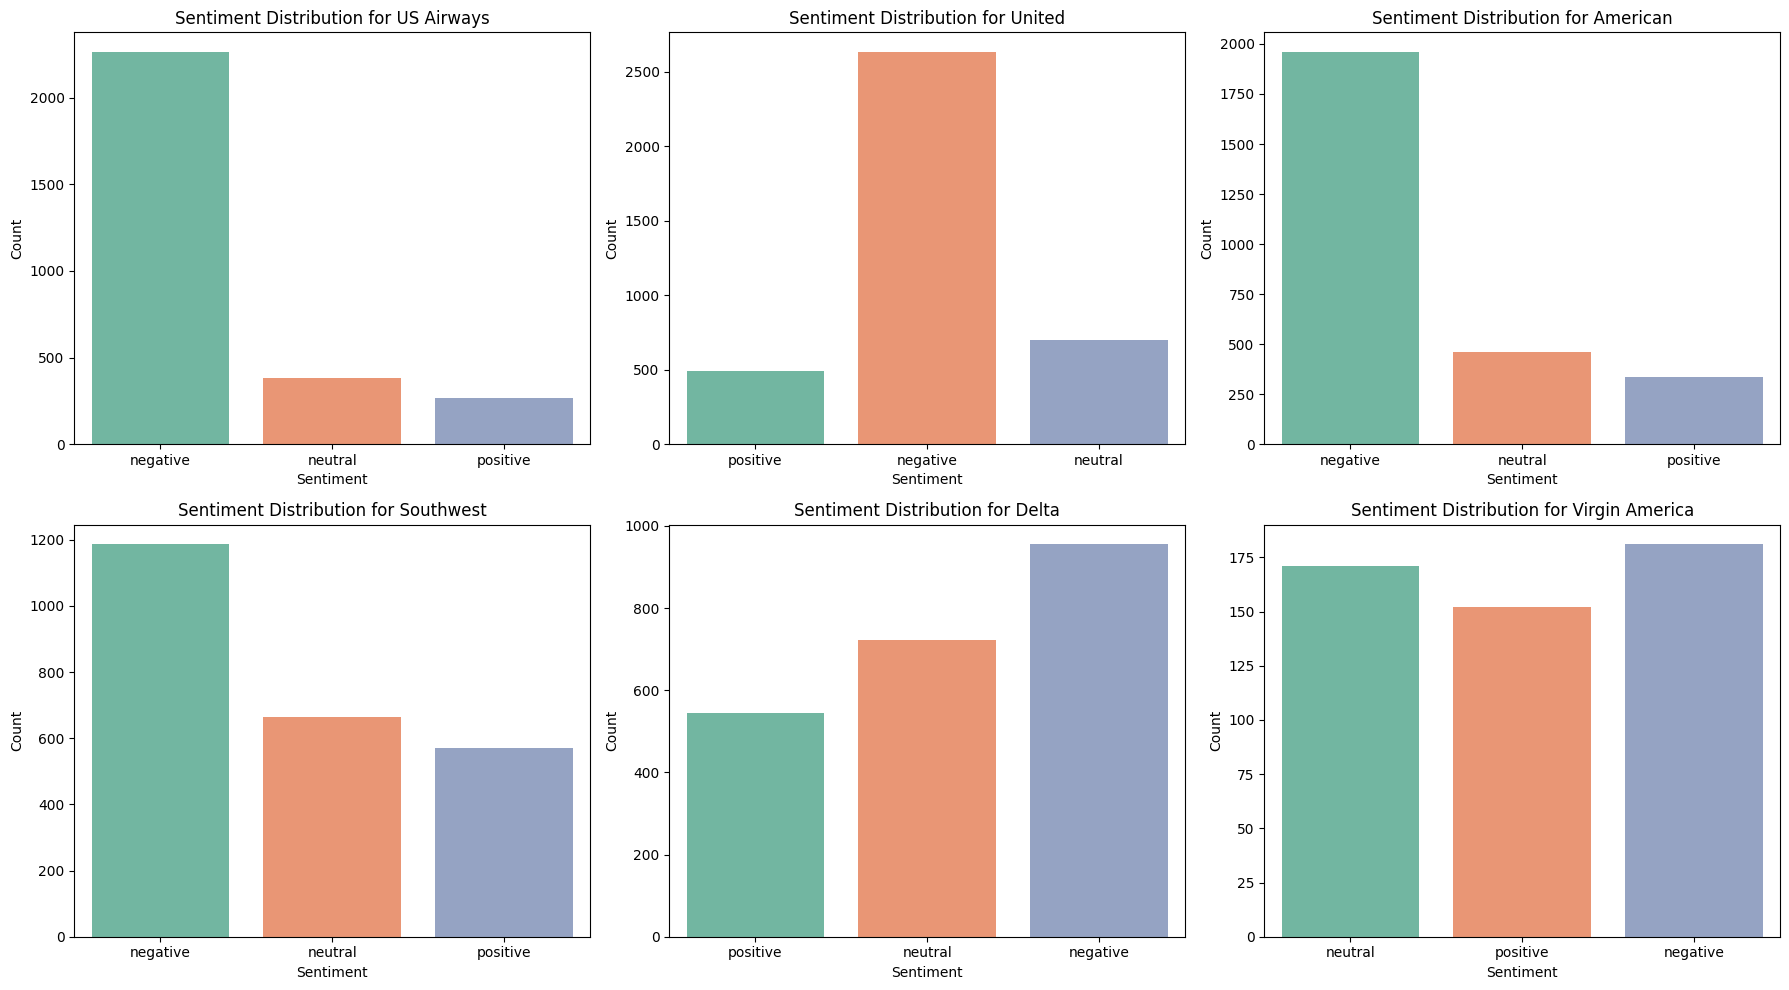

In [ ]:
print("Total number of tweets for each airline :")
print(data.groupby('airline')['airline_sentiment'].count())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = data, palette = 'hls')
plt.show()
print("Total number of sentiment tweets for each airline :")
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, airline in enumerate(airlines):
    row = i // 3
    col = i % 3
    print('{} : \n'.format(airline), data.loc[data.airline == airline].airline_sentiment.value_counts())
    ax = sns.countplot(x='airline_sentiment', data=data[data.airline == airline], palette='Set2', ax=axes[row, col])
    ax.set_title(label='Sentiment Distribution for {}'.format(airline), fontsize=12)
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


Reasons Of Negative Tweets :
negativereason
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: count, dtype: int64


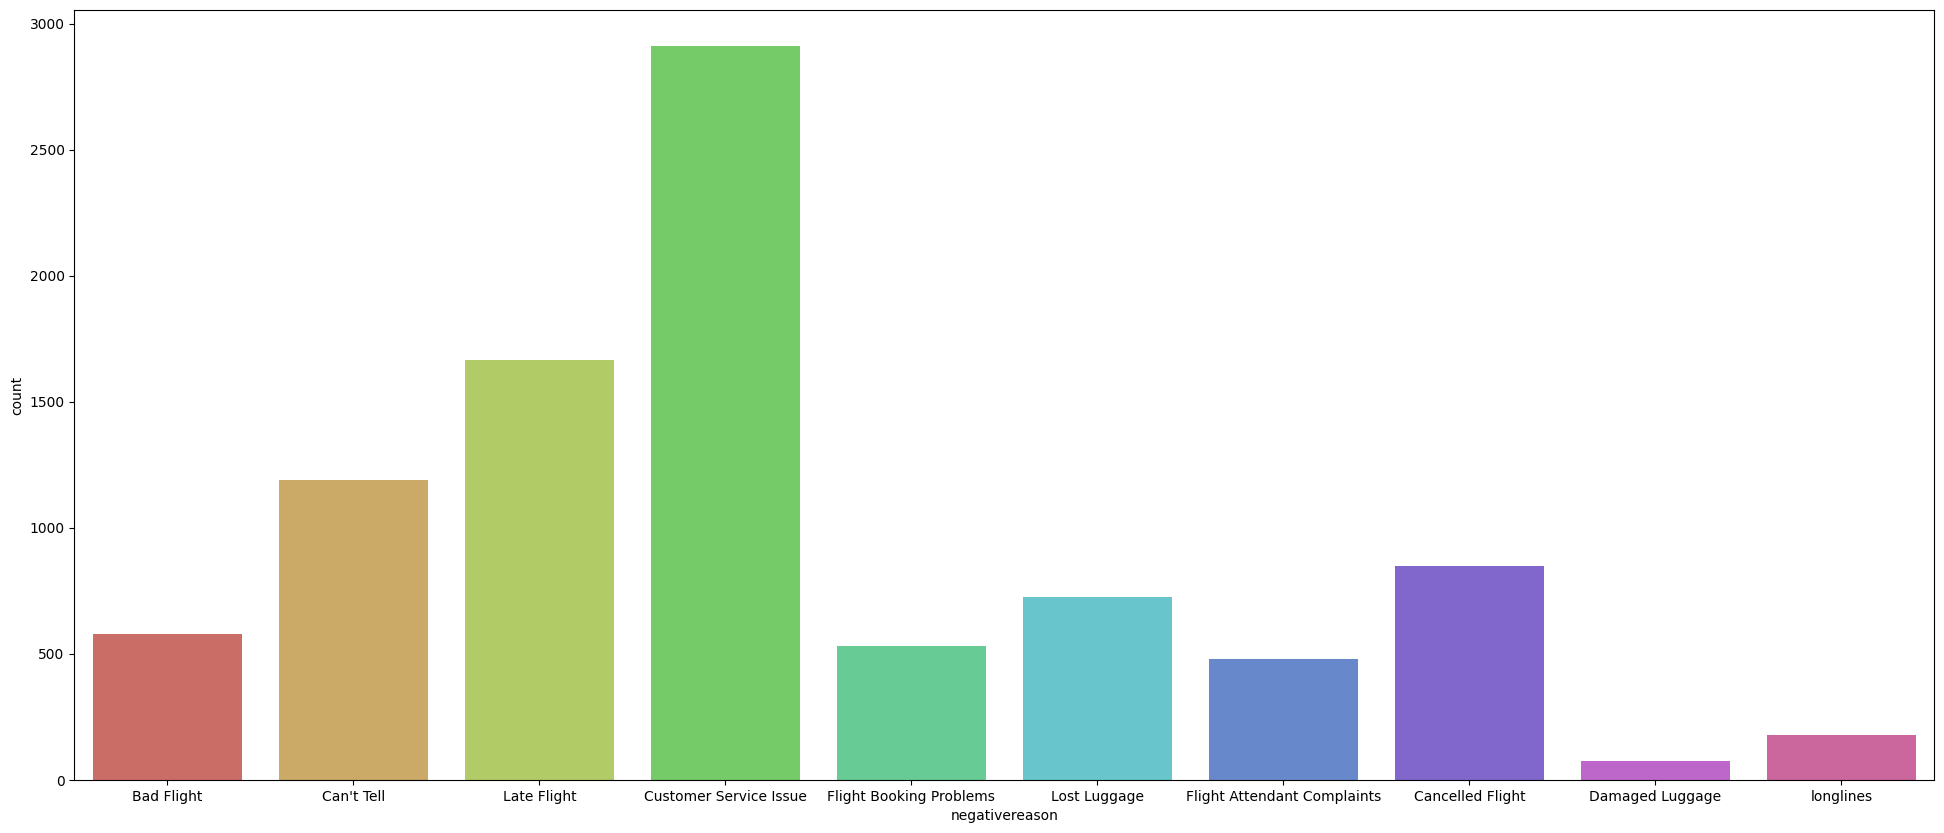

In [ ]:
print('Reasons Of Negative Tweets :')
print(data.negativereason.value_counts())

plt.figure(figsize = (24, 10))
sns.countplot(x = 'negativereason', data = data, palette = 'hls')
plt.show()

In [ ]:
# Split text of Sentiments
positive = data[data['airline_sentiment'] == 'positive'].text
neutral  = data[data['airline_sentiment'] == 'neutral'].text
negative  = data[data['airline_sentiment'] == 'negative'].text

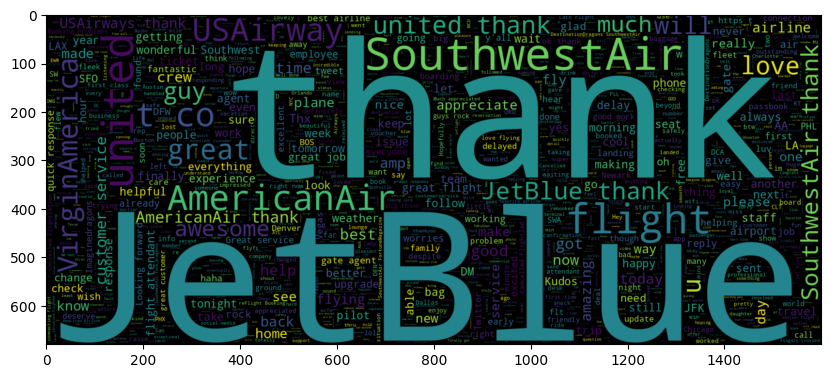

In [ ]:
# world cloud of positive sentiments
plt.figure(figsize = (10,10))
worldcloud_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(positive))
plt.imshow(worldcloud_pos,interpolation = 'bilinear')
ax.grid(False)

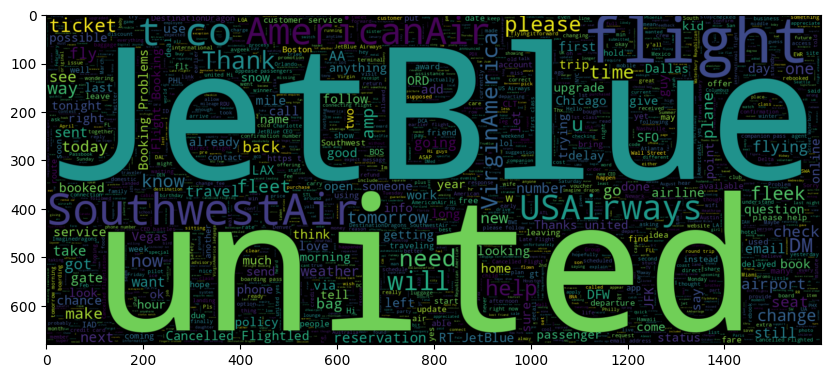

In [ ]:
# world cloud of neutral sentiments
plt.figure(figsize = (10,10))
worldcloud_neutral = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(neutral))
plt.imshow(worldcloud_neutral,interpolation = 'bilinear')
ax.grid(False)

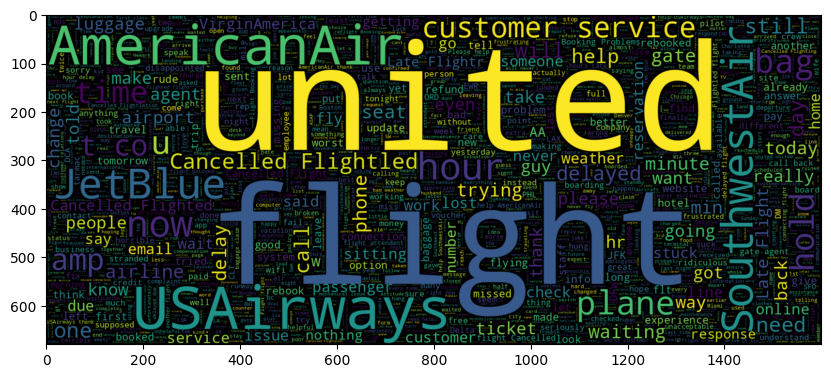

In [ ]:
# world could of negative sentiments
plt.figure(figsize = (10,10))
worldcloud_neg = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(negative))
plt.imshow(worldcloud_neg,interpolation = 'bilinear')
ax.grid(False)

In [ ]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [ ]:
# Apply convert_Sentiment function
data.airline_sentiment = data.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [ ]:
data.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [ ]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)
# Remove html
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
import nltk
nltk.download('stopwords')
# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)

    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0)

    if len(tchr) > 1:
        return tchr[0:2]

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
data['final_text'] = data['negativereason'].fillna('') + ' ' + data['text']


# Apply functions on tweets
data['final_text'] = data['final_text'].apply(lambda x : remove_username(x))
data['final_text'] = data['final_text'].apply(lambda x : remove_url(x))
data['final_text'] = data['final_text'].apply(lambda x : remove_emoji(x))
data['final_text'] = data['final_text'].apply(lambda x : decontraction(x))
data['final_text'] = data['final_text'].apply(lambda x : seperate_alphanumeric(x))
data['final_text'] = data['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
data['final_text'] = data['final_text'].apply(lambda x : char(x))
data['final_text'] = data['final_text'].apply(lambda x : x.lower())
data['final_text'] = data['final_text'].apply(lambda x : remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# result
data['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [ ]:
X = data['final_text']
y = data['airline_sentiment']

In [ ]:
# Apply TFIDF on cleaned tweets
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [ ]:
# Handling imbalanced using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm,y_sm = smote.fit_resample(X_final,y)

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(rf, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
class_report = classification_report(y_sm, y_pred)
print(f"Classification Report:\n{class_report}")

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(xgb, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

In [ ]:
gbc = GradientBoostingClassifier()
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(gbc, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

In [ ]:
svc = SVC()
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(svc, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

In [ ]:
mnb = MultinomialNB()
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(mnb, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

In [ ]:
dt = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(dt, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Decision Tree - Accuracy: {accuracy}")
print(f"Decision Tree - F1 Score: {f1}")
print(f"Decision Tree - Confusion Matrix:\n{conf_matrix}")
print(f"Decision Tree - Classification Report:\n{class_report}")

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
lr = LogisticRegression(max_iter=1000)
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(lr, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Logistic Regression - Accuracy: {accuracy}")
print(f"Logistic Regression - F1 Score: {f1}")
print(f"Logistic Regression - Confusion Matrix:\n{conf_matrix}")
print(f"Logistic Regression - Classification Report:\n{class_report}")

Logistic Regression - Accuracy: 0.9097842667247766
Logistic Regression - F1 Score: 0.9094850394863133
Logistic Regression - Confusion Matrix:
[[9048   93   37]
 [ 187 8428  563]
 [  70 1534 7574]]
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9178
           1       0.84      0.92      0.88      9178
           2       0.93      0.83      0.87      9178

    accuracy                           0.91     27534
   macro avg       0.91      0.91      0.91     27534
weighted avg       0.91      0.91      0.91     27534



In [ ]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(bagging, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"Bagging - Accuracy: {accuracy}")
print(f"Bagging - F1 Score: {f1}")
print(f"Bagging - Confusion Matrix:\n{conf_matrix}")
print(f"Bagging - Classification Report:\n{class_report}")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)
skf = StratifiedKFold(n_splits=10)
y_pred = cross_val_predict(adaboost, X_sm, y_sm, cv=skf)
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
print(f"AdaBoost - Accuracy: {accuracy}")
print(f"AdaBoost - F1 Score: {f1}")
print(f"AdaBoost - Confusion Matrix:\n{conf_matrix}")
print(f"AdaBoost - Classification Report:\n{class_report}")

In [ ]:
from sklearn.linear_model import SGDClassifier
# Initialize Stochastic Gradient Descent classifier
sgd = SGDClassifier()
# Use StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=10)
# Perform cross-validation predictions
y_pred = cross_val_predict(sgd, X_sm, y_sm, cv=skf)
# Calculate performance metrics
accuracy = accuracy_score(y_sm, y_pred)
f1 = f1_score(y_sm, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_sm, y_pred)
class_report = classification_report(y_sm, y_pred)
# Print the performance metrics and confusion matrix
print(f"SGDClassifier - Accuracy: {accuracy}")
print(f"SGDClassifier - F1 Score: {f1}")
print(f"SGDClassifier - Confusion Matrix:\n{conf_matrix}")
print(f"SGDClassifier - Classification Report:\n{class_report}")

SGDClassifier - Accuracy: 0.8897363259969492
SGDClassifier - F1 Score: 0.8884465824669544
SGDClassifier - Confusion Matrix:
[[9142   15   21]
 [ 236 8428  514]
 [  92 2158 6928]]
SGDClassifier - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9178
           1       0.80      0.92      0.85      9178
           2       0.93      0.75      0.83      9178

    accuracy                           0.89     27534
   macro avg       0.90      0.89      0.89     27534
weighted avg       0.90      0.89      0.89     27534



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Assuming X_sm and y_sm are defined
# Define the individual classifiers
lr = LogisticRegression()
dt = DecisionTreeClassifier()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=42)

# Initialize VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lg', lr),
    ('svm', dt)
], voting='hard')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
voting_predictions = voting_clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, voting_predictions)
f1 = f1_score(y_test, voting_predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, voting_predictions)
class_report = classification_report(y_test, voting_predictions)

# Print the performance metrics and confusion matrix
print(f"VotingClassifier (LogisticRegression + DecisionTree) - Accuracy: {accuracy}")
print(f"VotingClassifier (LogisticRegression + DecisionTree) - F1 Score: {f1}")
print(f"VotingClassifier (LogisticRegression + DecisionTree) - Confusion Matrix:\n{conf_matrix}")
print(f"VotingClassifier (LogisticRegression + DecisionTree) - Classification Report:\n{class_report}")


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Assuming X_sm and y_sm are defined
# Define the individual classifiers
lr = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, stratify=y_sm, random_state=42)

# Initialize VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', lr),
    ('svm', svm),
    ('ds', dt)
], voting='hard')

# Fit the VotingClassifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
voting_predictions = voting_clf.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, voting_predictions)
f1 = f1_score(y_test, voting_predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, voting_predictions)
class_report = classification_report(y_test, voting_predictions)

# Print the performance metrics and confusion matrix
print(f"VotingClassifier (LogisticRegression + SVM + DecisionTree) - Accuracy: {accuracy}")
print(f"VotingClassifier (LogisticRegression + SVM + DecisionTree) - F1 Score: {f1}")
print(f"VotingClassifier (LogisticRegression + SVM + DecisionTree) - Confusion Matrix:\n{conf_matrix}")
print(f"VotingClassifier (LogisticRegression + SVM + DecisionTree) - Classification Report:\n{class_report}")


VotingClassifier (LogisticRegression + SVM + DecisionTree) - Accuracy: 0.9417105502088251
VotingClassifier (LogisticRegression + SVM + DecisionTree) - F1 Score: 0.9414418769887748
VotingClassifier (LogisticRegression + SVM + DecisionTree) - Confusion Matrix:
[[1834    1    0]
 [  21 1756   59]
 [  10  230 1596]]
VotingClassifier (LogisticRegression + SVM + DecisionTree) - Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1835
           1       0.88      0.96      0.92      1836
           2       0.96      0.87      0.91      1836

    accuracy                           0.94      5507
   macro avg       0.94      0.94      0.94      5507
weighted avg       0.94      0.94      0.94      5507



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
voting_clf = VotingClassifier(estimators=[
    ('sgd', sgd),
    ('log_reg', lr)
], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"VotingClassifier (SGD + LogisticRegression) - Accuracy: {accuracy}")
print(f"VotingClassifier (SGD + LogisticRegression) - F1 Score: {f1}")
print(f"VotingClassifier (SGD + LogisticRegression) - Confusion Matrix:\n{conf_matrix}")
print(f"VotingClassifier (SGD + LogisticRegression) - Classification Report:\n{class_report}")

VotingClassifier (SGD + LogisticRegression) - Accuracy: 0.8910477573996731
VotingClassifier (SGD + LogisticRegression) - F1 Score: 0.8895806790820139
VotingClassifier (SGD + LogisticRegression) - Confusion Matrix:
[[1831    3    1]
 [  42 1704   90]
 [  21  443 1372]]
VotingClassifier (SGD + LogisticRegression) - Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1835
           1       0.79      0.93      0.85      1836
           2       0.94      0.75      0.83      1836

    accuracy                           0.89      5507
   macro avg       0.90      0.89      0.89      5507
weighted avg       0.90      0.89      0.89      5507



Random Forest - Accuracy: 0.9616110990048667
Random Forest - F1 Score: 0.9615168052087185
XGB - Accuracy: 0.9211157114839834
XGB - F1 Score: 0.9208542110395654
Gradient Boosting - Accuracy: 0.8757536137139537
Gradient Boosting - F1 Score: 0.87461801040899
SVC - Accuracy: 0.9440328321348151
SVC - F1 Score: 0.9437616110873699
Multinomial NB - Accuracy: 0.8634778818914797
Multinomial NB - F1 Score: 0.8613681045160999
Decision Tree - Accuracy: 0.9492627297159875
Decision Tree - F1 Score: 0.9492893288030386
Logistic Regression - Accuracy: 0.9113822909856905
Logistic Regression - F1 Score: 0.9110649976840868
Bagging - Accuracy: 0.9542747148979444
Bagging - F1 Score: 0.9542282803618658
AdaBoost - Accuracy: 0.9554005956272246
AdaBoost - F1 Score: 0.955386963419975
SGD - Accuracy: 0.8905353381274062
SGD - F1 Score: 0.8892115977160562
Voting (LR + DT) - Accuracy: 0.9185734001598024
Voting (LR + DT) - F1 Score: 0.9177321676958557
Voting (LR + SVM + DT) - Accuracy: 0.9434880511367764
Voting (LR + 

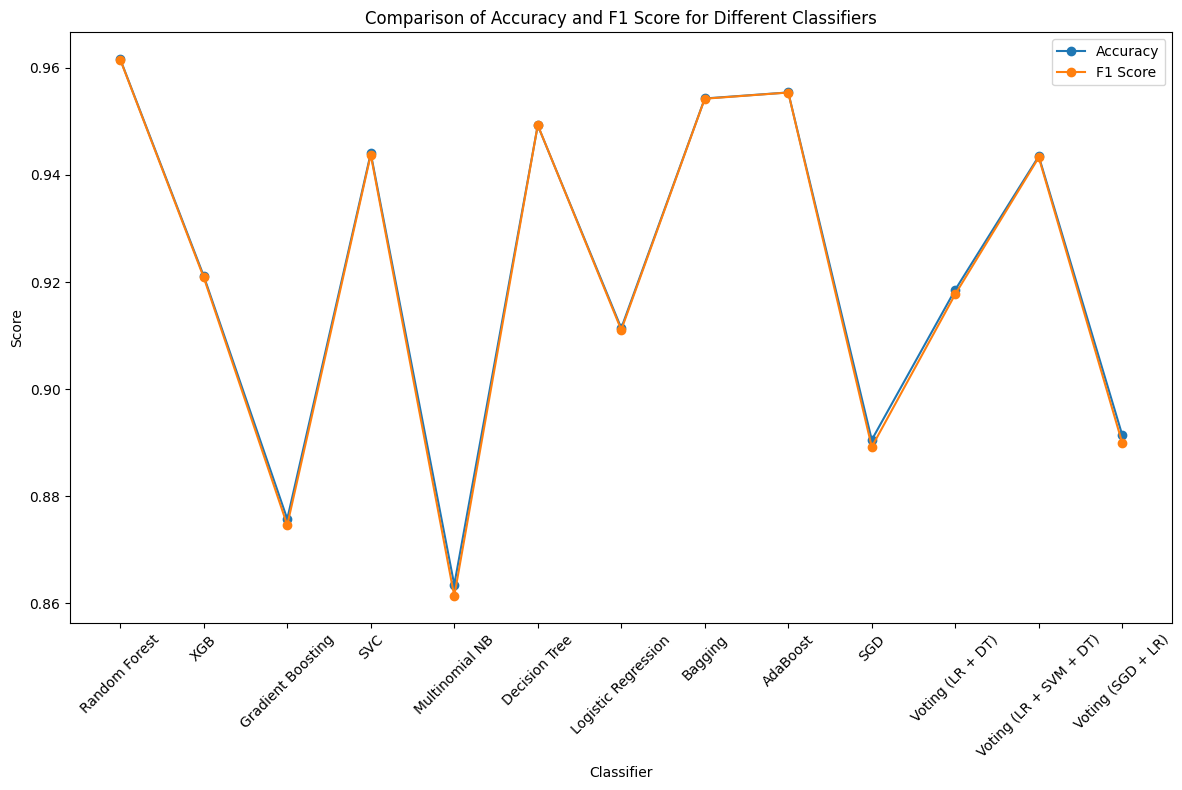

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

# Lists to store the accuracy and F1 scores
accuracy_list = []
f1_score_list = []
classifiers = [
    ('Random Forest', RandomForestClassifier()),
    ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVC', SVC()),
    ('Multinomial NB', MultinomialNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)),
    ('AdaBoost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)),
    ('SGD', SGDClassifier()),
    ('Voting (LR + DT)', VotingClassifier(estimators=[
        ('lg', LogisticRegression()),
        ('dt', DecisionTreeClassifier())], voting='hard')),
    ('Voting (LR + SVM + DT)', VotingClassifier(estimators=[
        ('lr', LogisticRegression()),
        ('svm', SVC()),
        ('ds', DecisionTreeClassifier())], voting='hard')),
    ('Voting (SGD + LR)', VotingClassifier(estimators=[
        ('sgd', SGDClassifier()),
        ('log_reg', LogisticRegression())], voting='hard'))
]

# Assuming X_sm and y_sm are defined
for name, clf in classifiers:
    skf = StratifiedKFold(n_splits=10)
    y_pred = cross_val_predict(clf, X_sm, y_sm, cv=skf)
    accuracy = accuracy_score(y_sm, y_pred)
    f1 = f1_score(y_sm, y_pred, average='weighted')
    accuracy_list.append(accuracy)
    f1_score_list.append(f1)
    print(f"{name} - Accuracy: {accuracy}")
    print(f"{name} - F1 Score: {f1}")

# Plotting the comparison graph
x_labels = [name for name, _ in classifiers]

plt.figure(figsize=(12, 8))
plt.plot(x_labels, accuracy_list, marker='o', label='Accuracy')
plt.plot(x_labels, f1_score_list, marker='o', label='F1 Score')
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Comparison of Accuracy and F1 Score for Different Classifiers')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

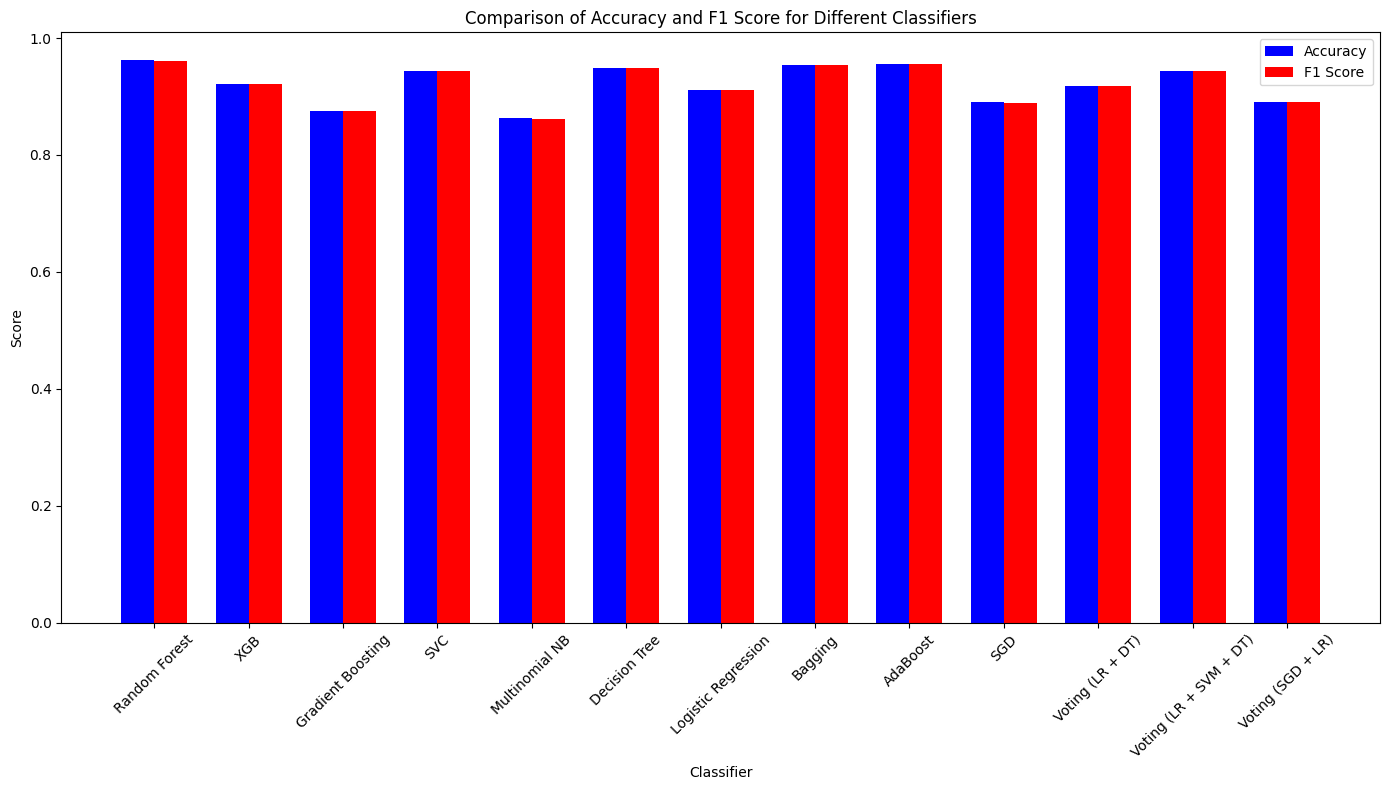

In [ ]:
x_labels = [name for name, _ in classifiers]

plt.figure(figsize=(14, 8))
bar_width = 0.35
index = range(len(classifiers))

# Plot bars for Accuracy and F1 Score
plt.bar(index, accuracy_list, bar_width, label='Accuracy', color='blue')
plt.bar([i + bar_width for i in index], f1_score_list, bar_width, label='F1 Score', color='r')

plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Comparison of Accuracy and F1 Score for Different Classifiers')
plt.xticks([i + bar_width/2 for i in index], x_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()